# Supermarket Sales Prediction


**In highly populated cities, supermarkets are experiencing significant growth, leading to intense market competition. This dataset contains historical sales data from a supermarket company.**

# IMPORTING THE LIBRARIES

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# LOADING THE DATASET

In [126]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# UNDERSTANDING THE DATA

In [127]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [128]:
df.shape

(1000, 17)

In [129]:
df.size

17000

In [130]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [131]:
df.max()

Invoice ID                       898-04-2717
Branch                                     C
City                                  Yangon
Customer type                         Normal
Gender                                  Male
Product line               Sports and travel
Unit price                             99.96
Quantity                                  10
Tax 5%                                 49.65
Total                                1042.65
Date                                3/9/2019
Time                                   20:59
Payment                              Ewallet
cogs                                   993.0
gross margin percentage             4.761905
gross income                           49.65
Rating                                  10.0
dtype: object

In [132]:
df.min()

Invoice ID                            101-17-6199
Branch                                          A
City                                     Mandalay
Customer type                              Member
Gender                                     Female
Product line               Electronic accessories
Unit price                                  10.08
Quantity                                        1
Tax 5%                                     0.5085
Total                                     10.6785
Date                                     1/1/2019
Time                                        10:00
Payment                                      Cash
cogs                                        10.17
gross margin percentage                  4.761905
gross income                               0.5085
Rating                                        4.0
dtype: object

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [134]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [135]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [136]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [137]:
df.value_counts()

Invoice ID   Branch  City       Customer type  Gender  Product line         Unit price  Quantity  Tax 5%   Total     Date       Time   Payment      cogs    gross margin percentage  gross income  Rating
101-17-6199  A       Yangon     Normal         Male    Food and beverages   45.79       7         16.0265  336.5565  3/13/2019  19:44  Credit card  320.53  4.761905                 16.0265       7.0       1
641-62-7288  B       Mandalay   Normal         Male    Home and lifestyle   99.92       6         29.9760  629.4960  3/24/2019  13:33  Ewallet      599.52  4.761905                 29.9760       7.1       1
633-91-1052  A       Yangon     Normal         Female  Home and lifestyle   12.03       2         1.2030   25.2630   1/27/2019  15:51  Cash         24.06   4.761905                 1.2030        5.1       1
634-97-8956  A       Yangon     Normal         Male    Food and beverages   32.90       3         4.9350   103.6350  2/17/2019  17:27  Credit card  98.70   4.761905             

**Checking Null Value**

In [138]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [139]:
df.isnull().values.any()

False

# **Exploratory Data Analysis**

**HISTOGRAM**

**A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.**

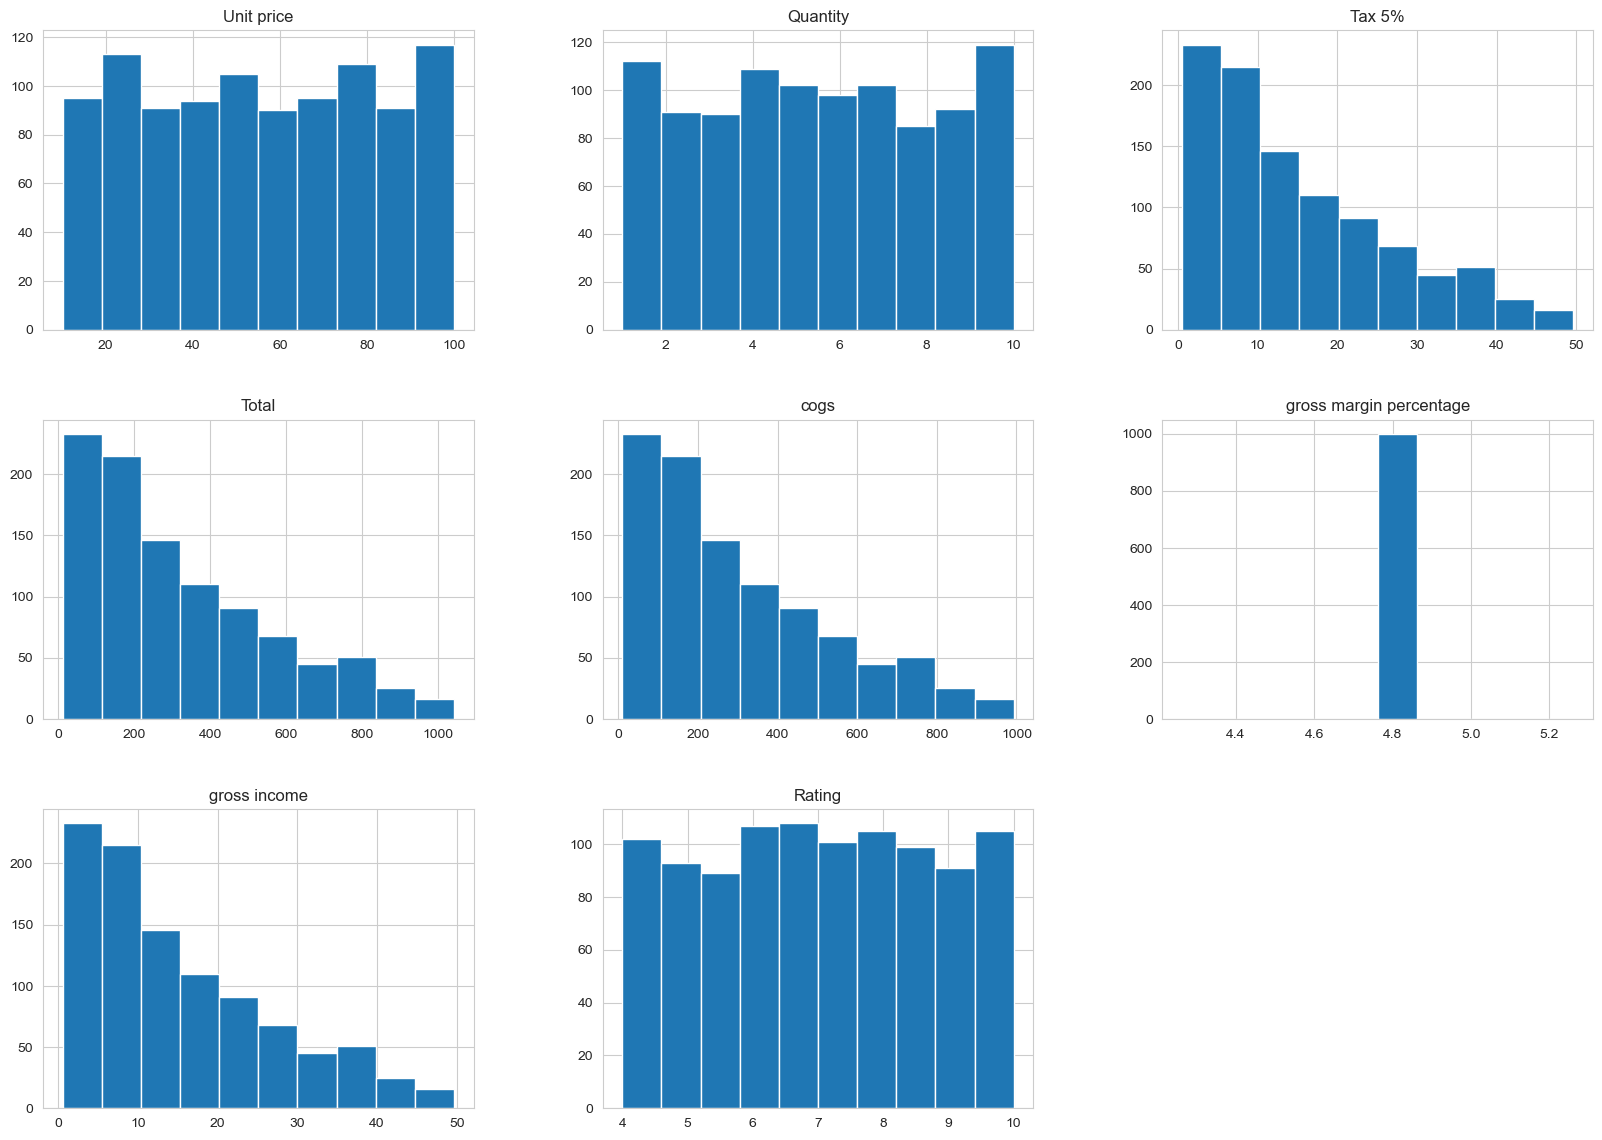

In [140]:
df.hist(figsize=(20,14))
plt.show()


**HEATMAP**

**A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. Heatmaps are used in various forms of analytics but are most commonly used to show user behaviour on specific webpages or webpage templates.**


<AxesSubplot:>

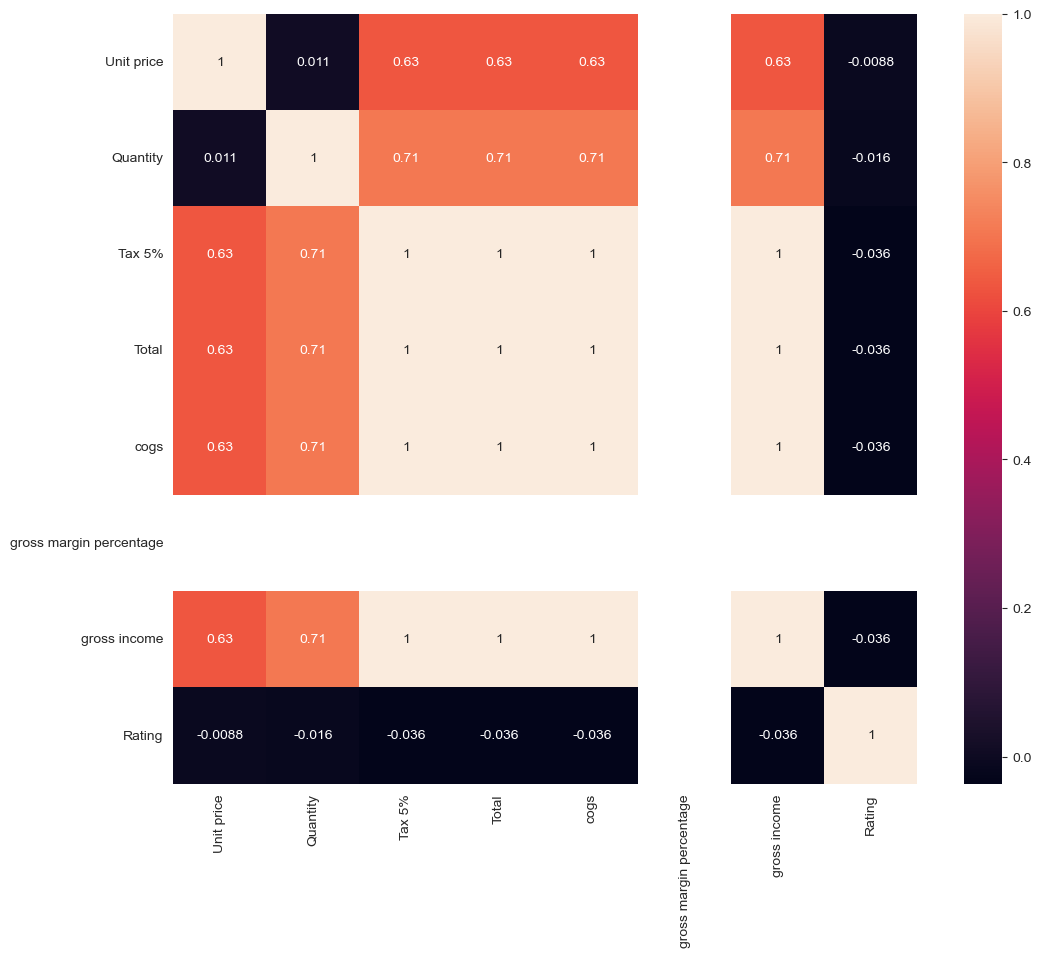

In [141]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)



In [142]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**BOXPLOT**

**A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). ... It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**



<AxesSubplot:xlabel='gross income'>

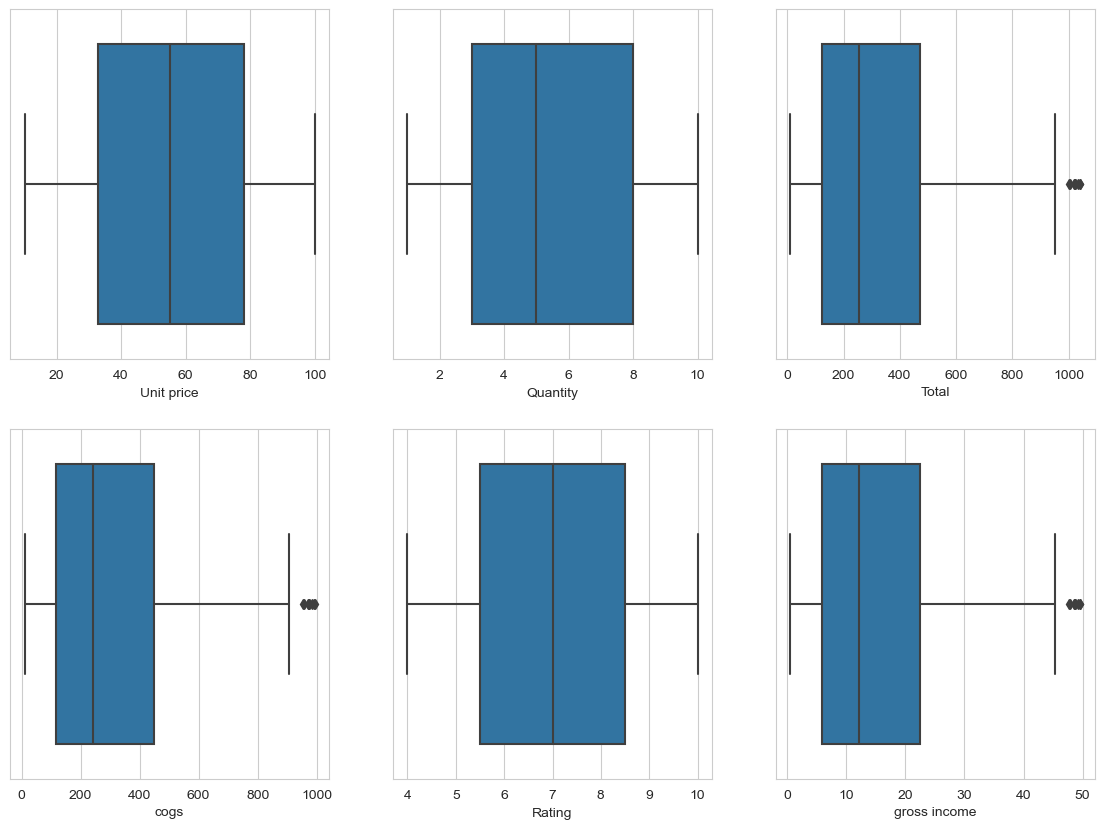

In [143]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)




**SCATTER PLOT**

**A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.**



<AxesSubplot:xlabel='Rating', ylabel='cogs'>

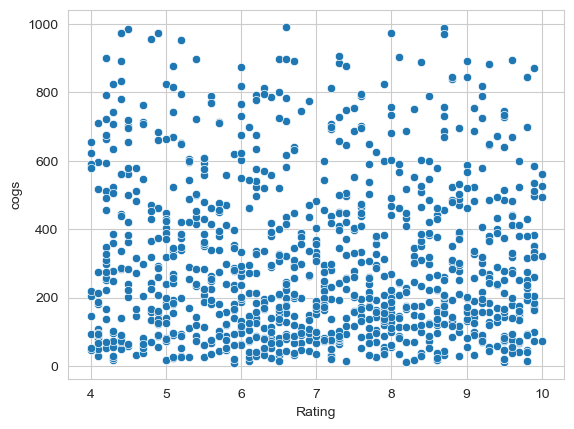

In [144]:
sns.scatterplot(x='Rating', y= 'cogs', data=df)

In [149]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

**BARPLOT**

**A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.**


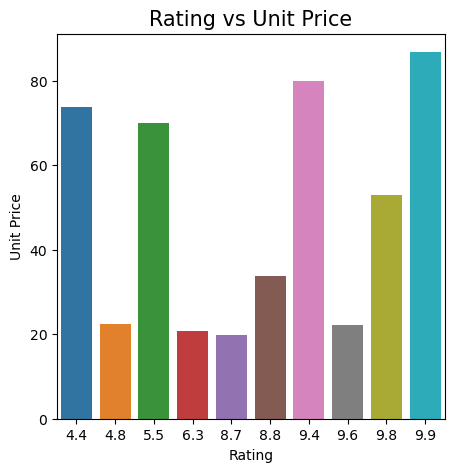

In [150]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()


In [151]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

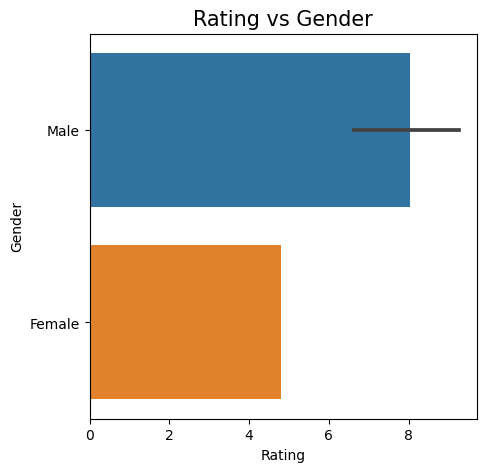

In [152]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=df[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

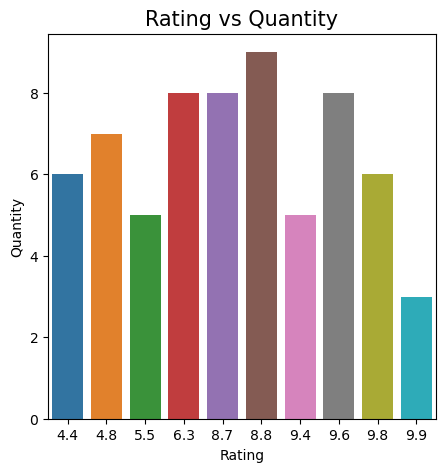

In [154]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

In [155]:
#lets find the categorialfeatures
list_1=list(df.columns)


In [156]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)


In [157]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [158]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])


In [159]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [160]:
y=df['Gender']
x=df.drop('Gender',axis=1)


# TRAINING AND TESTING DATA

In [627]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [628]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

750
250
750
250


# MODELS

In [629]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

**1. Logistic Regression**

**Logistic Regression is a simple yet powerful machine learning algorithm used for binary classification tasks. It estimates the probability of an instance belonging to one of two classes based on input features.**

In [630]:
lm = LogisticRegression(random_state=5)
lm.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

**Prediction**

In [631]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)
print(ypred_test)

[1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0
 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0
 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0
 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0]


In [632]:
df = pd.DataFrame(ypred_test, ytest)
df.head()

,0
Gender,
1,1
0,0
1,1
1,0
0,1


**Confusion Matrix**

In [633]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [634]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[88, 75],
       [87, 80]], dtype=int64)

<AxesSubplot:>

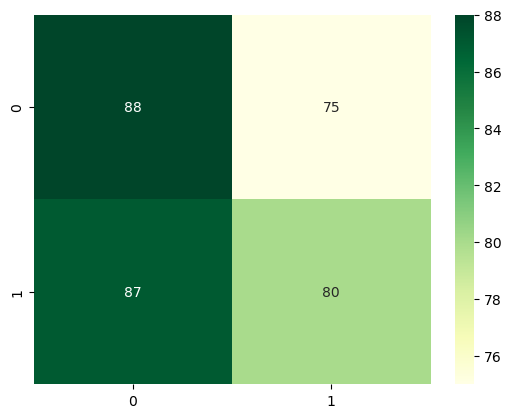

In [635]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

**Accuracy Score**

In [636]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 56.4179104477612
Accuracy of testing data: 50.90909090909091


**2. SVC**

**In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.**


In [637]:
svc = SVC(C=10)
svc.fit(xtrain, ytrain)

SVC(C=10)

**Prediction**

In [638]:
ypred_train = svc.predict(xtrain)
ypred_test = svc.predict(xtest)
# print(ypred_test)

**Confusion Matrix**

In [639]:
cmt = np.array(confusion_matrix(ypred_test, ytest))
cmt

array([[87, 97],
       [76, 70]], dtype=int64)

<AxesSubplot:>

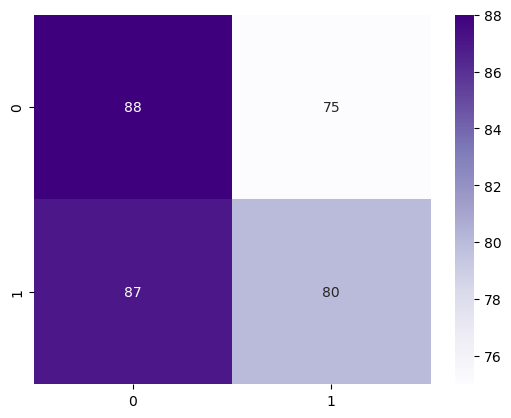

In [640]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Purples" ,fmt='g')

**Accuracy**

In [641]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 58.656716417910445
Accuracy of testing data: 47.57575757575758


**3. DECISION TREE CLASSIFIER**

**Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.**



In [642]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

**Prediction**

In [643]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

**Confusion Matrix**

In [644]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[83, 77],
       [80, 90]], dtype=int64)

<AxesSubplot:>

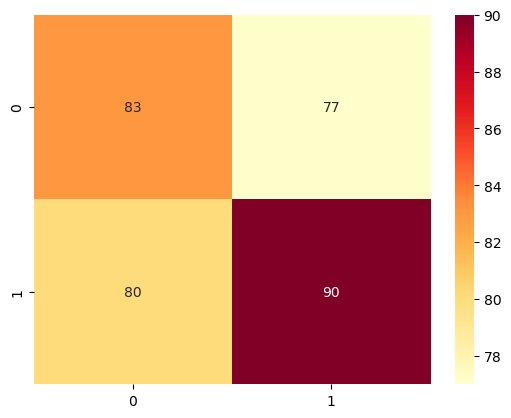

In [645]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='YlOrRd' ,fmt='g')

**Accuracy**

In [646]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 100.0
Accuracy of testing data: 52.42424242424243


**4. KNeighborsClassifier**

**By default, the KNeighborsClassifier looks for the 5 nearest neighbors. We must explicitly tell the classifier to use Euclidean distance for determining the proximity between neighboring points.**



In [647]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=4)

**Prediction**

In [648]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

**Confusion Matrix**

In [649]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[105, 122],
       [ 58,  45]], dtype=int64)

<AxesSubplot:>

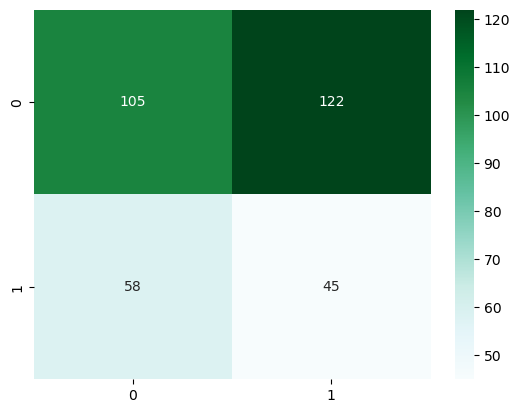

In [650]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuGn" ,fmt='g')

**Accuracy**

In [651]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 71.7910447761194
Accuracy of testing data: 45.45454545454545


**5. Naive Bayes**

**It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.**

In [652]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

**Prediction**

In [653]:
ypred_train = gnb.predict(xtrain)
ypred_test = gnb.predict(xtest)

**Confusion Matrix**

In [654]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[ 56,  54],
       [107, 113]], dtype=int64)

<AxesSubplot:>

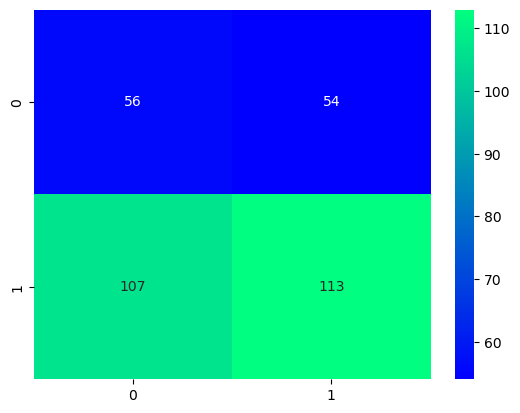

In [655]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='winter' ,fmt='g')

**Accuracy**

In [656]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac5 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 55.37313432835821
Accuracy of testing data: 51.21212121212121


**6.Random Forest Classifier**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.**



In [657]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

**Prediction**

In [658]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

**Confusion Matrix**

In [659]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[86, 83],
       [77, 84]], dtype=int64)

<AxesSubplot:>

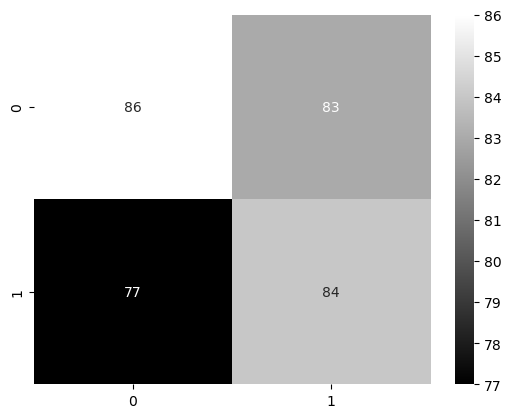

In [660]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="gray" ,fmt='g')

**Accuracy**

In [661]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac6 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac6)

Accuracy of training data: 100.0
Accuracy of testing data: 51.515151515151516


# Comparing Accuracies of different Models

In [662]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'SVM', ac3:'Decission Tree', ac4:'KNN', ac5: 'Naive Bayes', ac6: 'Random Forest'}

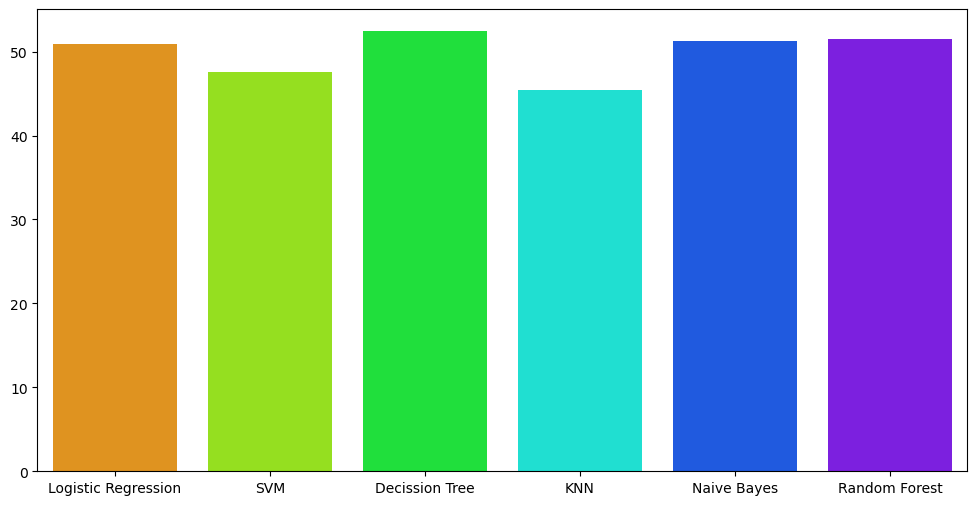

In [663]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

The model with highest Accuracy score is *Decision Tree CLassifier* with an accuracy of **52.424**

In [664]:
models = {
    "KNN": KNeighborsClassifier(),
    "SVM" :SVC(),
    "Naive Bayes": GaussianNB(),
    "Decisiontree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(max_features='sqrt', random_state=5),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(xtrain, ytrain)
    print(model[0])
    print("Score: ", m.score(xtest,ytest))
    print("")

KNN
Score:  0.46060606060606063

SVM
Score:  0.47878787878787876

Naive Bayes
Score:  0.5121212121212121

Decisiontree
Score:  0.5121212121212121



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


RandomForest
Score:  0.503030303030303

LogisticRegression
Score:  0.509090909090909



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model with highest Accuracy score is *Decision Tree CLassifier* with an accuracy of **52.424** and score of **0.512**

**7. Gradient Boosting Classifier**

**Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.**



In [665]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [666]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.50      0.49       124
           1       0.50      0.48      0.49       126

    accuracy                           0.49       250
   macro avg       0.49      0.49      0.49       250
weighted avg       0.49      0.49      0.49       250

Confusion Matrix:
 [[62 62]
 [65 61]]
Training Score:
 88.26666666666667


In [667]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
993,1,0
859,0,0
298,1,0
553,1,0
672,0,0
...,...,...
462,0,1
356,0,1
2,1,0
478,1,0


**8.Bagging Classifier**

**A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. ... The base estimator to fit on random subsets of the dataset.**



In [668]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.532

In [669]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
993,1,0
859,0,0
298,1,0
553,1,0
672,0,0
...,...,...
462,0,1
356,0,1
2,1,0
478,1,0


**CONCLUSION :**
    
**ACCURACIES OF DIFFERENT MODELS ARE:**

**KNeighbors Classifier= 45.45 %**

**SVC= 47.57 %**

**Logistic Regression = 50.90 %**

**Naiye Bayes= 51.21 %**

**Decision Tree Classifier= 52.42 %**

**Random Forest Classifier= 51.51 %**

**Gradient Boosting Classifier= 88.26 %**

**Bagging Classifier = 53.2 %**



**We got a good accuracy of about 52.42 % using Desicion Tree Classifier and Gradient Boosting Classifier which is quite well for the given dataset.**

**The accuracy of other models can be increased further by HyperTuning.**











# **THANK YOU**